In [3]:
from bs4 import BeautifulSoup
import requests
from selenium import webdriver
import time
import datetime
import csv
import pandas as pd

url = 'https://shopee.sg/Nintendo-Switch-Console-System-(Red-Blue)-i.25484840.1276047619'

header = ["Price", "Time"]

def get_html_data(url):    
    #driver = webdriver.Chrome(executable_path = r"C:\Users\dell\chromedriver.exe")
    driver = webdriver.Chrome(executable_path = r"C:\Users\PC\Downloads\chromedriver.exe")
    driver.get(url)
    time.sleep(5)
    html_data = driver.page_source
    driver.close()
    return html_data

def get_price():
    data = get_html_data(url)
    soup = BeautifulSoup(data, 'html.parser')
    priceline = soup.find_all("div",{"class":"_3n5NQx"})
    price = priceline[0].get_text()   
    return float(price[1::])

def get_time():
    time = datetime.datetime.now()
    return time

def write(row):
    with open("price_record.csv", "a", newline="") as f:
        csv.writer(f).writerow(row)
        
p_now = get_price()
t_now = get_time()


In [4]:
print(p_now); print(t_now)

459.0
2019-10-05 08:38:24.153771


In [9]:
#write(header)

In [10]:
try:
    while True:
        price1 = get_price()
        time1 = get_time()
        record = [price1, time1]
        time.sleep(60)
        write(record)
        
except KeyboardInterrupt:
    pass

In [11]:
data = pd.read_csv('price_record.csv')
data.tail()

,459,2019-10-02 19:13:51.841630
8,459.0,2019-10-02 19:38:16.097999
9,459.0,2019-10-02 19:39:47.552806
10,459.0,2019-10-05 08:38:55.379994
11,459.0,2019-10-05 08:43:05.249474
12,459.0,2019-10-05 08:44:22.775119


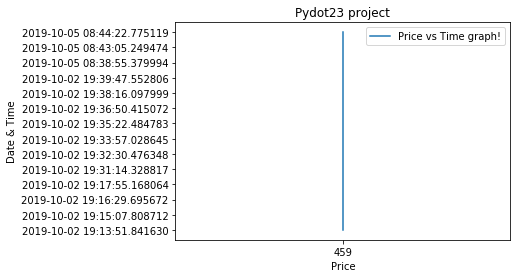

In [13]:
import matplotlib.pyplot as plt

x = []
y = []

with open('price_record.csv','r') as csvfile:
    file = csv.reader(csvfile, delimiter=',')
    for row in file:
        x.append((row[0]))
        y.append((row[1]))
        
plt.plot(x,y, label='Price vs Time graph!')
plt.xlabel('Price')
plt.ylabel('Date & Time')
plt.title('Pydot23 project')
plt.legend()
plt.show()